# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute the SVD of the training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    
    # Keep only the first `n_components` singular values and corresponding vectors
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]
    
    # Project the training data onto the reduced number of components
    X_train_reduced = np.dot(U_train[:, :n_components], S_train_reduced)
    
    # Project the test data onto the same space
    X_test_reduced = np.dot(X_test, Vt_train_reduced.T)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [14]:
svd_components = [784, 200, 100, 50, 20]  # Experimenting with different SVD components

# Store the results as a list of dictionaries
results = []
singular_vectors = {}  # Dictionary to store Vt_train for each SVD run

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Store the singular vectors (Vt_train) for visualization (only if n_components is 784)
    if n_components == 784:
        _, _, Vt_train = np.linalg.svd(X_train, full_matrices=False)
        singular_vectors['784'] = Vt_train
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Print results for each iteration
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    
    # Store the results for later analysis
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

# Now, proceed to plot the results and visualize singular vectors


Training models with different levels of SVD preprocessing...

Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9209, Training time: 874.1851 seconds

Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 144.7897 seconds

Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 52.8072 seconds

Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 14.0722 seconds

Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 1.3710 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


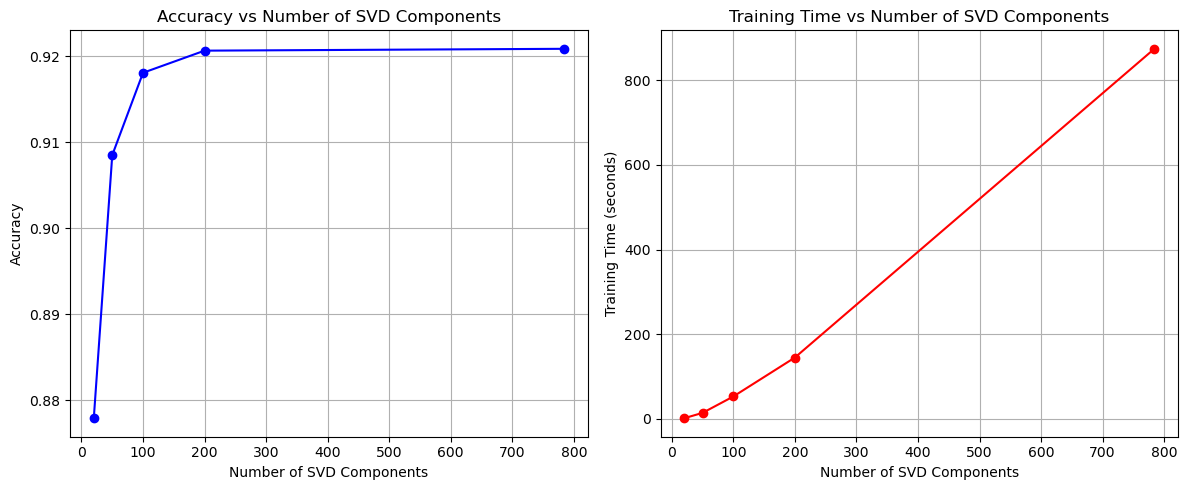

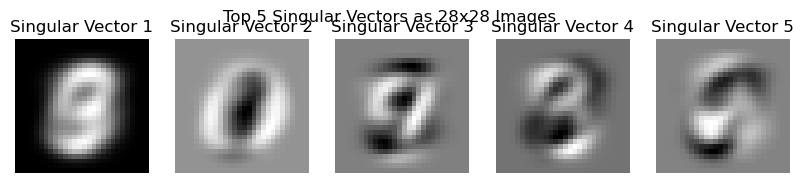

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Plot Accuracy and Training Time as a function of SVD components

def plot_results(results):
    n_components = [result['n_components'] for result in results]
    accuracy = [result['accuracy'] for result in results]
    training_time = [result['training_time'] for result in results]
    
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(n_components, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    # Plot training time
    plt.subplot(1, 2, 2)
    plt.plot(n_components, training_time, marker='o', linestyle='-', color='r', label='Training Time (seconds)')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_results(results)


# Part 2: Visualize the Top 5 Singular Vectors

def visualize_top_singular_vectors(Vt_train):
    plt.figure(figsize=(10, 2))
    
    # Take the top 5 singular vectors from Vt_train
    for i in range(5):
        singular_vector = Vt_train[i].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    
    plt.suptitle("Top 5 Singular Vectors as 28x28 Images")
    plt.show()

# Visualize the top 5 singular vectors if available for the 784 component case
if '784' in singular_vectors:
    visualize_top_singular_vectors(singular_vectors['784'])
else:
    print("No singular vectors available for visualization.")


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

We clearly see diminishing returns after an early point. We notice that at around 200 components, we see little to no return. It's also interesting to note that even having the number of singular values that were selected be the maximum number of singular values, we don't see a 100% accuracy. This is most likely dependent on the fact that the testing and training dataset are different. 